# Part 1: Decoding and Classifying Alien Communications

## Submitted by **team grey**
Debangan Sarkar <br>
Akshat Namdeo<br>
Abhinav Singh Naruka<br>
Ashi Gupta

Indian Institute of Technology Roorkee

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
df= pd.read_csv('data.csv')
df.head()

,message,fingers,tail,species
0,pluvia arbor aquos,4,no,Aquari
1,cosmix xeno nebuz odbitaz,5,yes,Zorblax
2,solarix glixx novum galaxum quasar,5,yes,Zorblax
3,arbor insectus pesros ekos dootix nimbus,2,yes,Florian
4,mermax drakos lorix epikoz deftax,4,no,Faerix


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  500 non-null    object
 1   fingers  500 non-null    int64 
 2   tail     500 non-null    object
 3   species  500 non-null    object
dtypes: int64(1), object(3)
memory usage: 15.8+ KB


In [6]:
pd.isnull(df).sum()

,0
message,0
fingers,0
tail,0
species,0


clean dataset, no null or missing values


In [7]:
df.describe()

,fingers
count,500.000000
mean,3.688000
std,1.792507
min,0.000000
25%,2.000000
50%,4.000000
75%,5.000000
max,9.000000


In [8]:
df['species'].value_counts()


,count
species,
Quixnar,60
Cybex,55
Emotivor,54
Florian,52
Zorblax,51
Mythron,50
Aquari,48
Sentire,44
Faerix,43


fingers
4    96
5    94
3    92
2    80
1    52
6    49
7    17
8    10
0     9
9     1
Name: count, dtype: int64


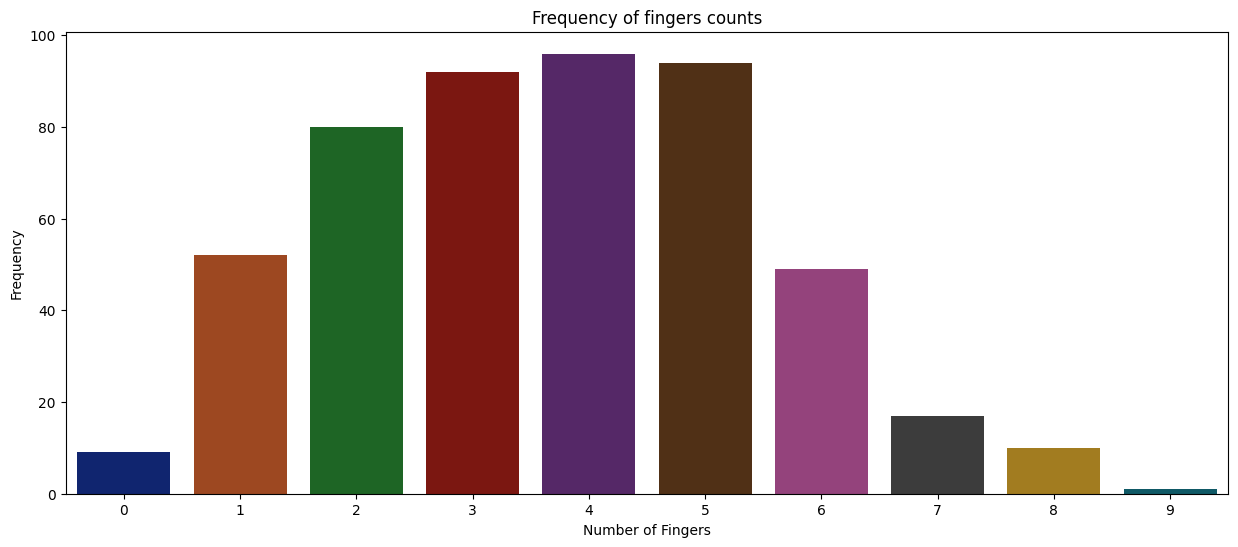

In [9]:
counts = df['fingers'].value_counts()
print(counts)
plt.figure(figsize=(15, 6))
sns.barplot(x=counts.index, y=counts.values, palette='dark', hue=counts.index, legend=False)
plt.title('Frequency of fingers counts')
plt.xlabel('Number of Fingers')
plt.ylabel('Frequency')
plt.show()

The graph shows that finger counts of 3 to 5 are the most frequent, while 0, 8, and 9 are the least common. Counts of 1, 2, and 6 have moderate frequencies. The distribution peaks at 3-5 fingers and tapers off symmetrically.

species
Zorblax     5.686275
Mythron     5.420000
Nexoon      4.441860
Sentire     4.250000
Quixnar     4.166667
Aquari      3.666667
Faerix      3.465116
Florian     2.673077
Cybex       1.836364
Emotivor    1.666667
Name: fingers, dtype: float64


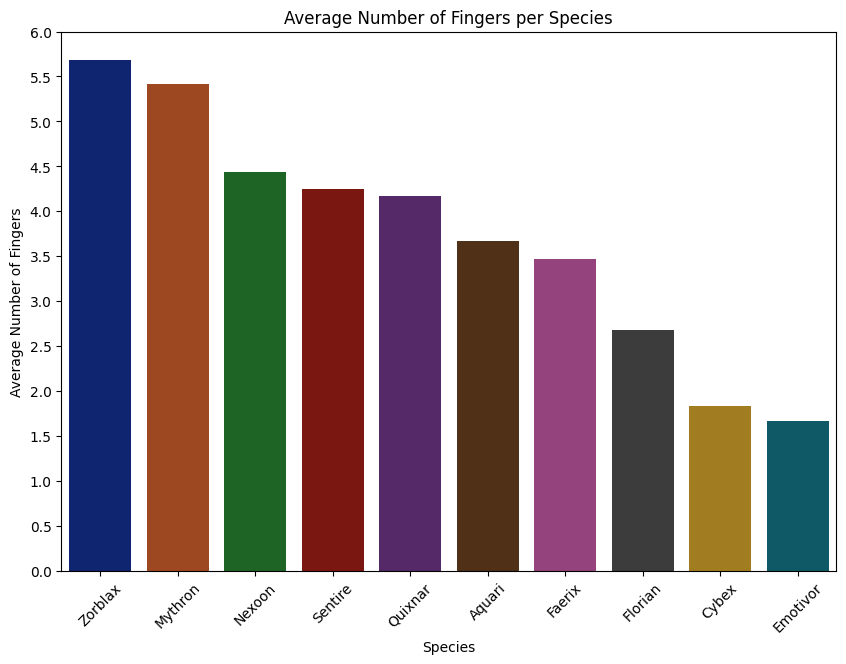

In [10]:
avg_fingers = df.groupby('species')['fingers'].mean().sort_values(ascending=False)
print(avg_fingers)
plt.figure(figsize=(10, 7))
sns.barplot(x=avg_fingers.index, y=avg_fingers.values, palette='dark', hue=avg_fingers.index, legend=False)
plt.title('Average Number of Fingers per Species')
plt.xlabel('Species')
plt.ylabel('Average Number of Fingers')
plt.yticks(np.arange(0, 6.5, 0.5))
plt.xticks(rotation=45)
plt.show()


The graph shows Zorblax with the highest average finger count (5.8), followed by Myrthon, Nexoon, and Sentire. Quixnar, Aquari, and Faetrix are mid-range, while Florian, Cybex, and Emotivor have the lowest averages (2.0-3.2)

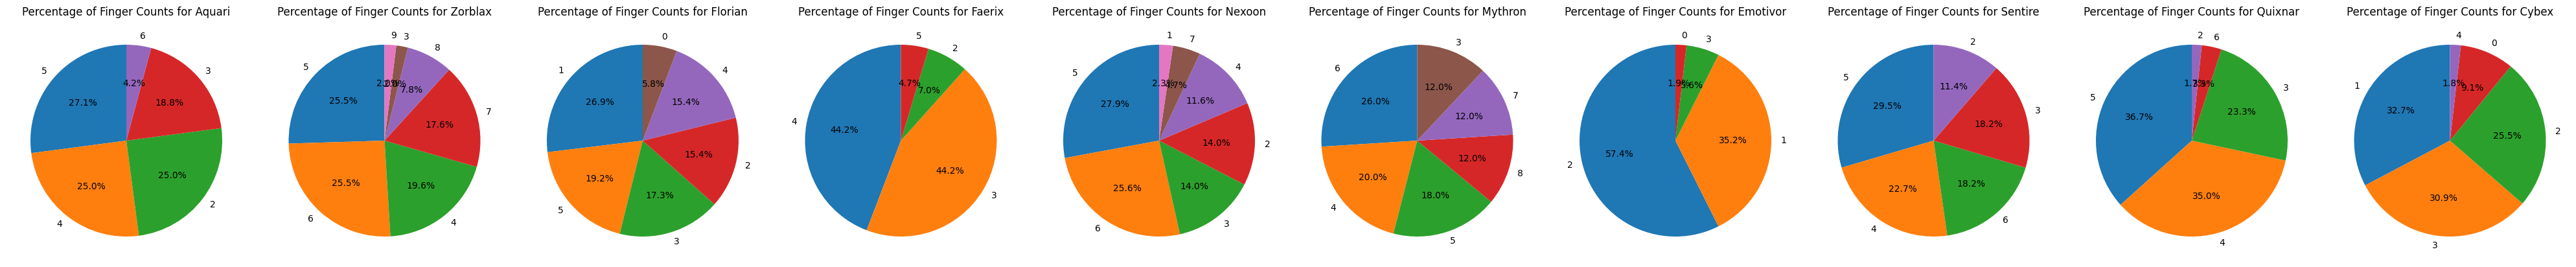

In [11]:
species = df['species'].unique()
num_species = len(species)  # Calculate the number of species

fig, axs = plt.subplots(1, num_species, figsize=(4 * num_species, 4))  # Create subplots

for i, species in enumerate(species):  # Iterate through species and index
    df_species = df[df['species'] == species]
    finger_counts = df_species['fingers'].value_counts()

    axs[i].pie(finger_counts, labels=finger_counts.index, autopct='%1.1f%%', startangle=90)  # Plot on subplot
    axs[i].set_title(f'Percentage of Finger Counts for {species}')

plt.tight_layout()
plt.show()


The pie charts show that species like Aquari, Faetrix, Quixnar, and Cybex mostly have 4-5 fingers. Zorblax, Nexoon, and Myrthon have more varied distributions, while Florian and Emotivor predominantly have 4 and 0 fingers, respectively. Sentire shows a broader spread across finger counts.

In [12]:
yes= df['tail'].value_counts().get('yes')
no= df['tail'].value_counts().get('no')
print(f"Number of 'yes' in tail column: {yes}")
print(f"Number of 'no' in tail column: {no}")

Number of 'yes' in tail column: 248
Number of 'no' in tail column: 252


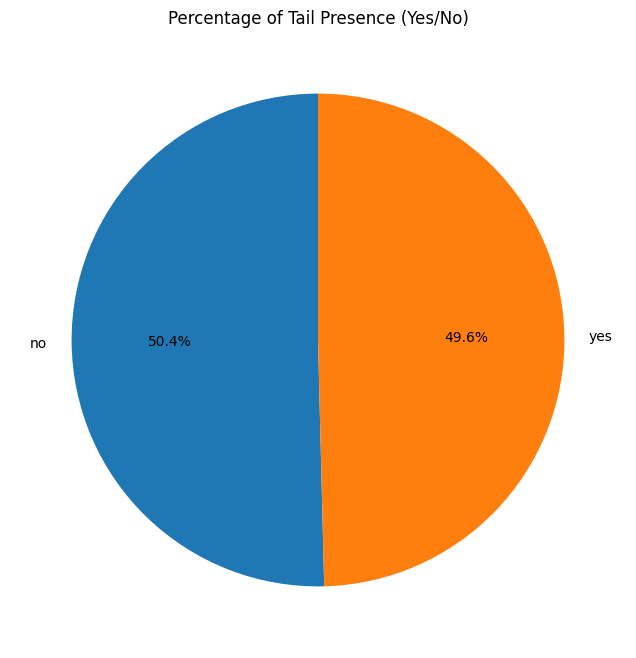

In [13]:
tail_counts = df['tail'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(tail_counts.values, labels=tail_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Tail Presence (Yes/No)')
plt.show()


tail      no  yes
species          
Florian    9   43
Mythron    9   41
Zorblax   11   40
Sentire    8   36
Nexoon     7   36
Emotivor  36   18
Quixnar   46   14
Faerix    34    9
Cybex     48    7
Aquari    44    4


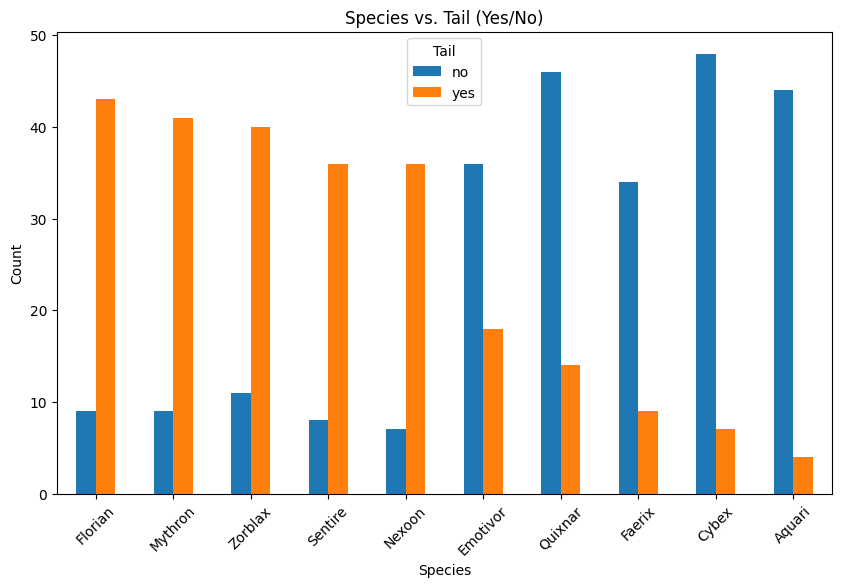

In [14]:
df['tail_map'] = df['tail'].map({'yes': 1, 'no': 0})

# Group by species and tail, then count occurrences
tail_counts = df.groupby(['species', 'tail'])['tail'].count().unstack().fillna(0)

tail_counts = tail_counts.sort_values(by=['yes', 'no'], ascending=[False, False])

print(tail_counts)

tail_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Species vs. Tail (Yes/No)')
plt.xlabel('Species')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Tail')
plt.show()

The bar chart depicts the relationship between species and the presence or absence of a tail. Here are some conclusions based on the visualized data:











The chart suggests that the presence or absence of a tail is highly species-dependent, with distinct patterns for each group.


1.   Florian, Myrthon, Zorbax, Sentre, Nexoon: These species predominantly have tails, with the count of individuals with tails far surpassing those without.
2.   Emotivar, Quixnar, Faerix, Cybex, Aquari: For these species, the majority of individuals do not have tails, with the counts of individuals without tails much higher than those with tails.


3.   Balanced Species: None of the species show a balanced distribution between individuals with tails and without tails; each species has a clear tendency towards either having or not having a tail.
4.  Distinct Trends:

  *   Species like Florian, Myrthon, Zorbax almost always have tails.
  *   Species like Quixnar, Cybex, Aquari predominantly do not have tails.

The chart suggests that the presence or absence of a tail is highly species-dependent, with distinct patterns for each group.




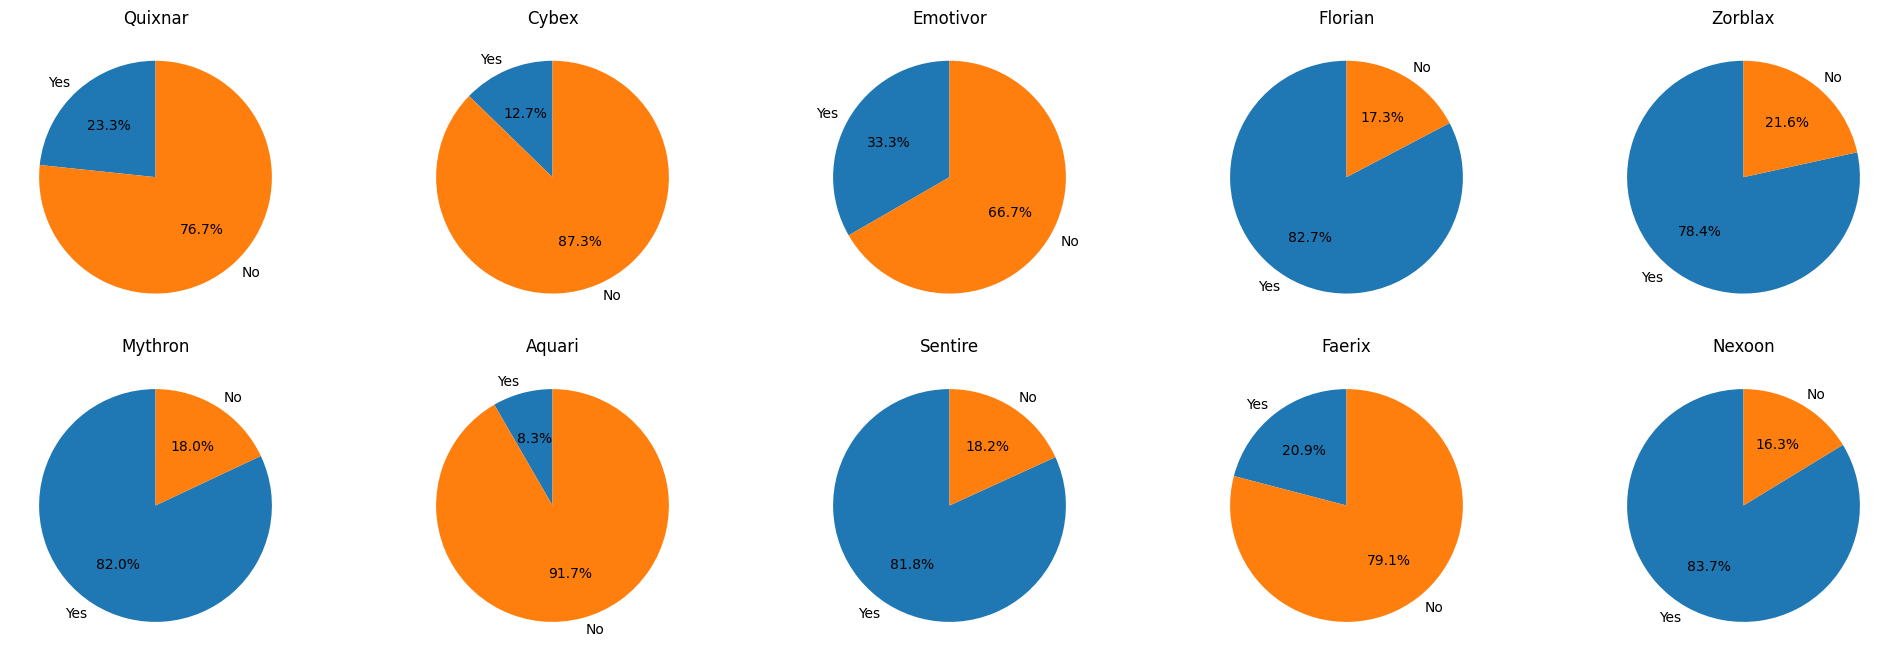

In [15]:
tail_count = df.groupby(['species', 'tail'])['tail'].count().unstack().fillna(0)
tail_count['total'] = tail_count['yes'] + tail_count['no']
tail_count = tail_count.sort_values(by='total', ascending=False)

fig, axs = plt.subplots(nrows=int(len(tail_count) / 5) + 1, ncols=5, figsize=(20, 10))

axs = axs.flatten()


i = 0
for species in tail_count.index:
    yes_count = tail_count.loc[species, 'yes']
    no_count = tail_count.loc[species, 'no']
    sizes = [yes_count, no_count]
    labels = ['Yes', 'No']
    axs[i].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    axs[i].set_title(species)
    i += 1

for j in range(i, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()


---
#Model Training using SVM


SVM was chosen because it’s good at handling complex data and drawing clear boundaries between categories, which works well for text. TF-IDF was used to convert words into numbers while focusing on the most important ones, reducing noise from common words. A pipeline was set up to handle both text and numerical features smoothly, making the process efficient and organized for better model performance.

In [16]:
# Convert 'tail' column to numerical (1 for 'yes', 0 for 'no')
import pandas as pd
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
df['tail'] = df['tail'].map({'yes': 1, 'no': 0})

# Encode the target variable (species)
label_encoder = LabelEncoder()
df['species_encoded'] = label_encoder.fit_transform(df['species'])

# Define features (X) and target (y)
X = df[['message', 'fingers', 'tail']]
y = df['species_encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('message', TfidfVectorizer(), 'message'),  # Apply TF-IDF on the 'message' column
        ('numeric', 'passthrough', ['fingers', 'tail'])  # Pass through the numerical columns
    ]
)

# Create an SVM pipeline with preprocessing and the model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('svm', SVC())  # Support Vector Machine
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'svm__C': [0.1, 1, 10],
    'svm__kernel': ['linear', 'rbf'],
    'svm__gamma': ['scale', 'auto']
}

# Initialize KFold for cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(pipeline, param_grid, cv=kf, scoring='accuracy')

# Train the model using the training data
grid_search.fit(X_train, y_train)

# Best parameters and accuracy from cross-validation
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

# Evaluate on the test data
y_pred = grid_search.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

# Output the results
print(f'Best Parameters: {best_params}')
print(f'Best Cross-Validation Accuracy: {best_accuracy} \n\n\n')
print(f'Test Accuracy: {test_accuracy*100}%')

# Load the test data for predictions
test_data = pd.read_csv('test.csv')

# Convert 'tail' column to numerical (1 for 'yes', 0 for 'no') if it exists in test data
if 'tail' in test_data.columns:
    test_data['tail'] = test_data['tail'].map({'yes': 1, 'no': 0})

# Prepare features for prediction
X_test_final = test_data[['message', 'fingers', 'tail']]

# Make predictions on the test data
predictions = grid_search.predict(X_test_final)

# Decode the predictions to species names
predicted_species = label_encoder.inverse_transform(predictions)

# Create a DataFrame for output
output_df = pd.DataFrame({'species': predicted_species})

# Save the output to a CSV file
output_df.to_csv('result.csv', index=False)

Best Parameters: {'svm__C': 1, 'svm__gamma': 'scale', 'svm__kernel': 'linear'}
Best Cross-Validation Accuracy: 0.8324999999999999 



Test Accuracy: 90.0%
